In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


In [3]:
df=pd.read_csv('/content/gld_price_data.csv')

In [4]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

<ipython-input-6-a6befb54552d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

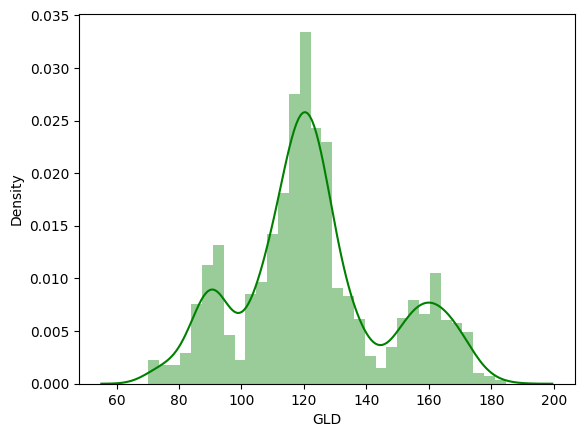

In [6]:
sns.distplot(df['GLD'],color='green')

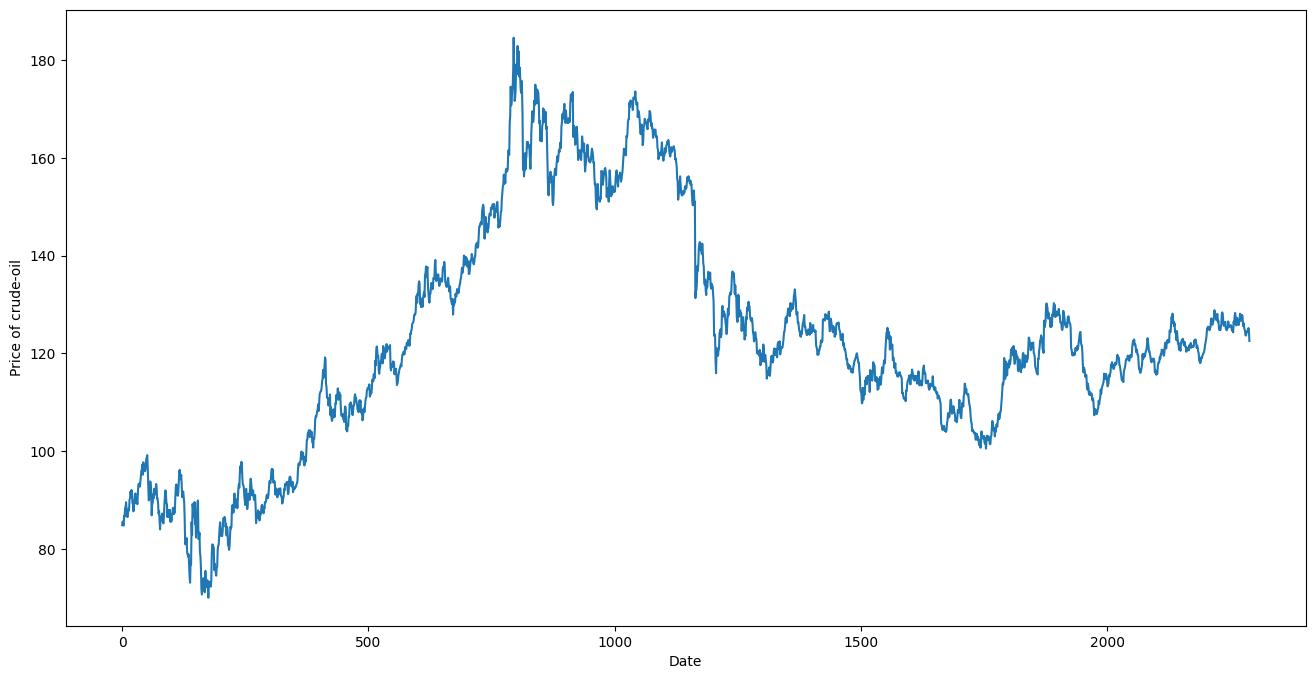

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df['GLD'])
plt.xlabel('Date')
plt.ylabel('Price of crude-oil')
plt.show()

In [8]:
corr=df.corr()
print(corr)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<ipython-input-8-a35e05d9e19d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [9]:
print(corr.GLD)

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: >

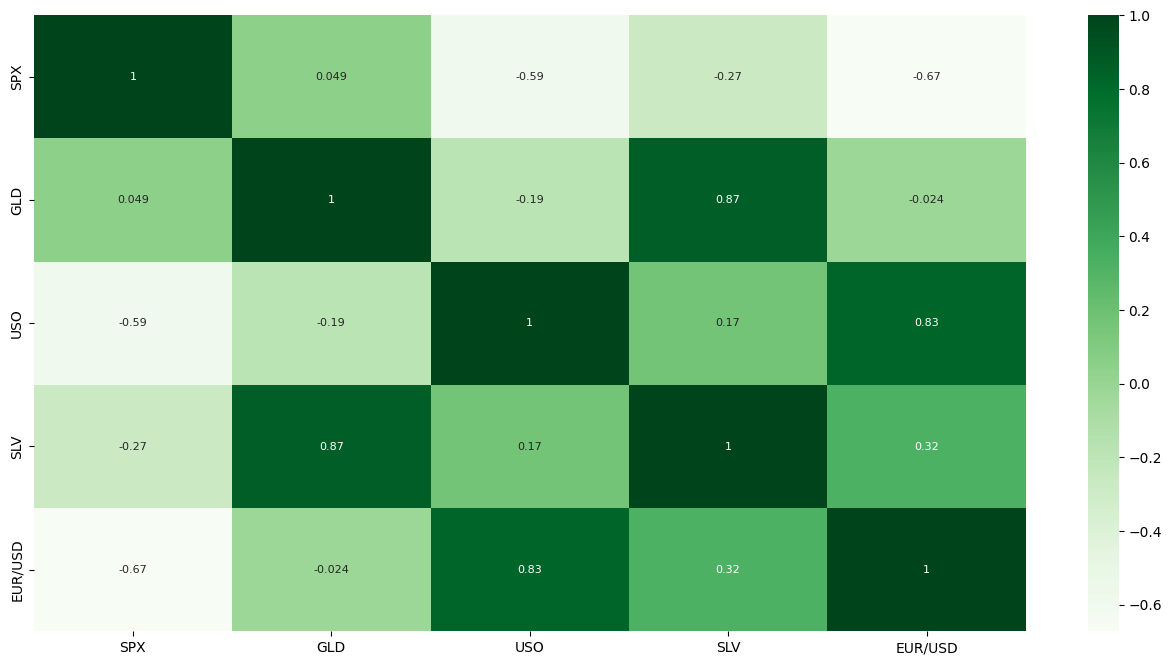

In [10]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,cbar=True,annot=True,annot_kws={'size':8},cmap='Greens')

In [11]:
X=df.drop(['GLD','Date'],axis=1)
Y=df['GLD']

X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [12]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=32)
X_train.shape

(1832, 4)

In [14]:
regressor1=LinearRegression()
regressor1.fit(X_train,Y_train)

LinearRegression()

In [16]:
regressor2=RandomForestRegressor()
regressor2.fit(X_train,Y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction1 = regressor1.predict(X_test)
test_data_prediction1

In [ ]:
test_data_prediction2 = regressor2.predict(X_test)
test_data_prediction2

In [22]:
error_score1=metrics.r2_score(Y_test,test_data_prediction1)
error_score2=metrics.r2_score(Y_test,test_data_prediction2)
print(error_score1,error_score2)

0.8852808684115121 0.9896629222209891


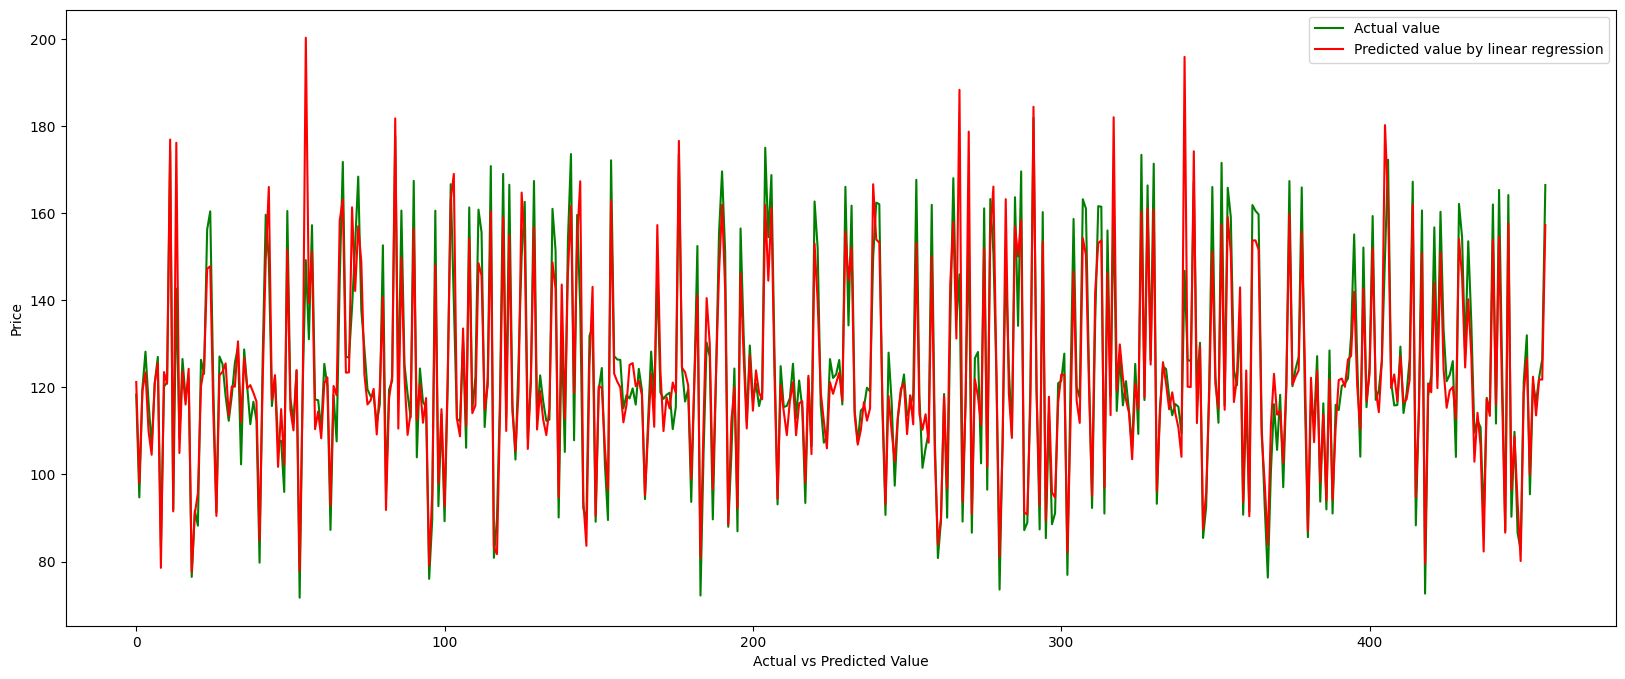

In [24]:
Y_test=list(Y_test)
plt.figure(figsize=(20,8))
plt.plot(Y_test,color='green', label='Actual value')
plt.plot(test_data_prediction1,color='red',label='Predicted value by linear regression')
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Price')
plt.legend()
plt.show()

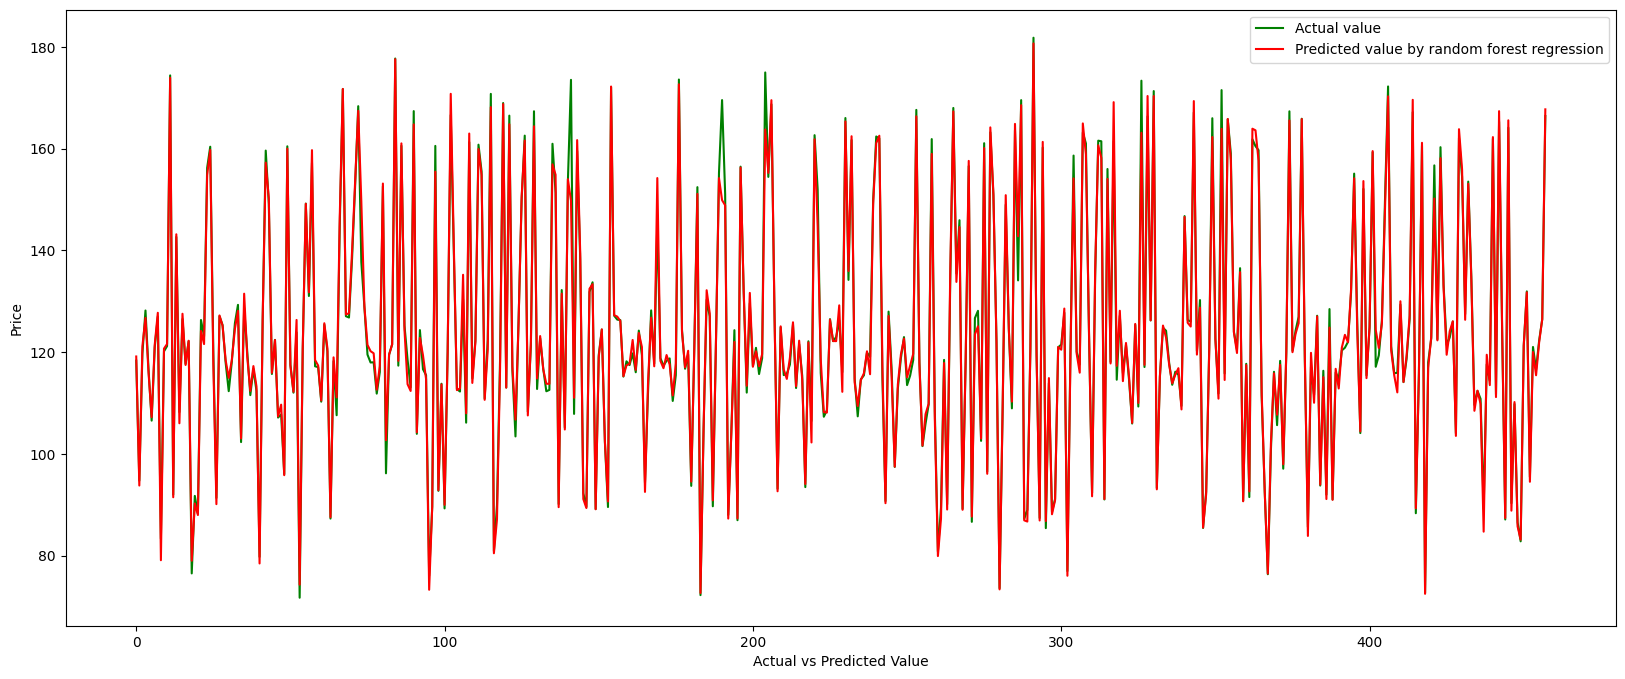

In [26]:
Y_test=list(Y_test)
plt.figure(figsize=(20,8))
plt.plot(Y_test,color='green', label='Actual value')
plt.plot(test_data_prediction2,color='red',label='Predicted value by random forest regression')
plt.xlabel('Actual vs Predicted Value')
plt.ylabel('Price')
plt.legend()
plt.show()